# 1. Импорт библиотек и загрузка ресурсов

На этом этапе подключаются все необходимые библиотеки для работы с текстом, визуализации, машинного обучения и кластеризации.
Также загружаются модели и ресурсы NLTK и spaCy.

In [1]:
!pip install pandas numpy matplotlib seaborn nltk spacy scikit-learn umap-learn openpyxl # устанавливаем все необходимые библиотеки для работы с таблицами, числовыми данными, визуализации, обработки текста, машинного обучения, снижения размерности
!python -m spacy download ru_core_news_sm # загружаем предобученную модель для русского языка

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 44.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import pandas as pd # для работы с таблицами и датасетами
import numpy as np # для численных операций и работы с массивами
import re # для работы с регулярными выражениями
import matplotlib.pyplot as plt # для работы с графиками
import seaborn as sns # для работы с графиками
import nltk # для обработки естественного языка
import spacy # для лемматизации
from nltk.corpus import stopwords # импорт стоп-слов
from nltk.tokenize import word_tokenize # импорт токенизатора
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #преобразует текст в TF-IDF признаки, преобразует текст в вектор частот слов
from sklearn.model_selection import train_test_split # делит данные на обучающую и тестовую выборки
from sklearn.linear_model import LogisticRegression # импорт логистической регрессии
from sklearn.metrics import classification_report, accuracy_score # метрики для оценки качества модели
from sklearn.cluster import KMeans # импорт алгоритма кластеризации
import umap.umap_ as umap # для визуализации кластеров


nltk.download('punkt_tab') # токенизатор слов
nltk.download('stopwords') # список стоп-слов
nlp = spacy.load('ru_core_news_sm') # для последующей лемматизации

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 2. Функции очистки и предобработки текста

Следующим этапом необходимо удалить лишние символы, привести к нижнему регистру, токенизировать и лемматизировать текст.
Также исключаются стоп-слова.

In [54]:
raw_stop_words = set(stopwords.words("russian")) | {
"c","а","алло","без","близко","более","больше","будем","будет",
    "будете","будто","буду","будут","будь","бы","бывает","бывь","был","была",
    "были","было","в","вам","вами","вас","ваш", "ваша","ваше","ваши","вверх","вдали",
    "вдруг","ведь","везде","весь","вместе","вне","вниз","внизу","во",
    "вокруг","вон","вообще","восемнадцатый","восемнадцать","восемь","восьмой","вот",
    "впрочем","все","все еще","всегда","всего","всем","всеми","всему","всех",
    "всею","всю","всюду","вся","всё","второй","вы","выйти","г","где",
    "да","давно","даже","далеко","дальше","даром","два","двадцатый","двадцать","две","двенадцатый",
    "двенадцать","двух","девятнадцатый","девятнадцать","девятый","девять","действительно",
    "дел","десятый","десять","для","до","довольно",
    "долго","должен","должно","должный","другая","другие","других","друго",
    "другое","другой","думать","е","его","ее","ей","ему","если","есть","еще","ещё","ею","её",
    "ж","ждать","же","за","занят","занята","занято","заняты","затем",
    "зато","зачем","здесь","земля","знать","значит","и","иди","идти","из","или","им","имеет",
    "имел","именно","ими","имя","иногда","их","к","каждая","каждое","каждые","каждый","кажется",
    "как","какая","какой","кем","когда","кого","ком","кому","конец","конечно",
    "которая","которого","которой","которые","который","которых","кроме","кругом","кто","куда","лежать","лет",
    "ли","лишь","лучше","м","мало","между","меля","менее",
    "меньше","меня","миллионов","мимо","мне","много","многочисленная",
    "многочисленное","многочисленные","многочисленный","мной","мною","мог","могу","могут","мож","может",
    "может быть","можно","можхо","мои","мой","мор","мочь","моя","моё","мы","на","наверху","над",
    "надо","назад","наиболее","наконец","нам","нами","нас","начала","наш","наша",
    "наше","наши","не","него","недавно","недалеко","нее","ней","некоторый","нельзя","нем","немного","нему",
    "непрерывно","нередко","несколько","нет","нею","неё","ни","нибудь","ниже","низко","никакой","никогда",
    "никто","никуда","ним","ними","них","ничего","ничто","но","ну","нужно",
    "нх","о","об","оба","обычно","один","одиннадцатый","одиннадцать","однажды","однако","одного","одной",
    "около","он","она","они","оно","опять","особенно","от",
    "откуда","отовсюду","отсюда","очень","первый","перед","по","под","подойди",
    "пожалуйста","позже","пойти","пока","пол","пор","пора","после",
    "последний","посреди","потом","потому","почему","почти","при","про",
    "просто","против","процентов","пятнадцатый","пятнадцать","пятый","пять","раз",
    "разве","рано","раньше","рядом","с","с кем","сам","сама",
    "сами","самим","самими","самих","само","самого","самой","самом","самому","саму","самый","свет","свое","своего",
    "своей","свои","своих","свой","свою","сделать","сеаой","себе","себя","седьмой","сейчас","семнадцатый",
    "семнадцать","семь","сих","сколько","слишком",
    "сначала","снова","со","собой","собою","совсем","спасибо","сразу","стал",
    "т","та","так","такая","также","таки",
    "такие","такое","такой","там","твои","твой","твоя","твоё","те","тебе","тебя","тем","теми","теперь","тех",
    "то","тобой","тобою","тогда","того","тоже","только","том","тому","тот","тою","третий","три",
    "тринадцатый","тринадцать","ту","туда","тут","ты","тысяч","у","уж","уже",
    "хорошо","хотел бы","хоть","хотя","хочешь","час","часто","часть","чаще","чего",
    "чем","чему","через","четвертый","четыре","четырнадцатый","четырнадцать","что","чтоб","чтобы","чуть",
    "шестнадцатый","шестнадцать","шестой","шесть","эта","эти","этим","этими","этих","это","этого","этой",
    "этом","этому","этот","эту","я","являюсь", "ради", "чём", "либо", "видимо"
}

stop_words = set()
for word in raw_stop_words:
    doc = nlp(word)
    for token in doc:
        stop_words.add(token.lemma_)

stop_words = list(stop_words)

def clean_text(text):
    text = text.lower() # приводим все символы к нижнему регистру
    text = re.sub(r'[^а-яё\s]', ' ', text) # удаляем все символы, кроме русских букв и пробелов
    text = re.sub(r'\s+', ' ', text).strip() # заменяем множественные пробелы одним и убираем пробелы в начале и конце строки
    return text

def preprocess_text(text):
    text = clean_text(text)
    tokens = word_tokenize(text, language="russian") # токенизируем текст на отдельные слова
    tokens = [token for token in tokens if token not in stop_words] # убираем стоп-слова
    doc = nlp(' '.join(tokens))
    lemmas = [token.lemma_ for token in doc if token.lemma_ not in stop_words] # применяем лемматизацию
    return ' '.join(lemmas)

# 3. Загрузка данных и предобработка

Далее загружаем Excel-файл с данными и применяем функцию предобработки текста.

In [55]:
df = pd.read_excel('irony_dataset.xlsx')
df['processed_text'] = df['Content'].apply(preprocess_text) # создаем новую колонку processed_text, где для каждого текста из столбца Content выполняется предобработка

<ipython-input-56-1270177130>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette='coolwarm')


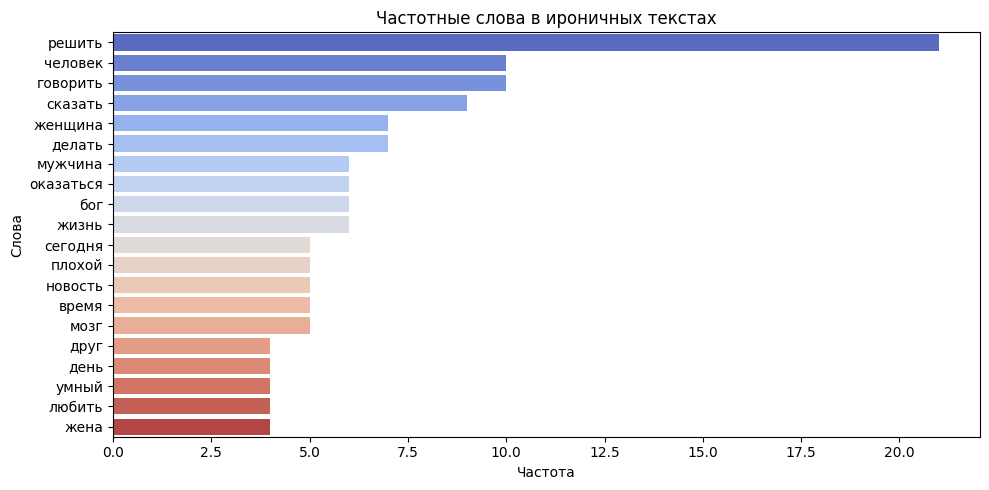

<ipython-input-56-1270177130>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette='coolwarm')


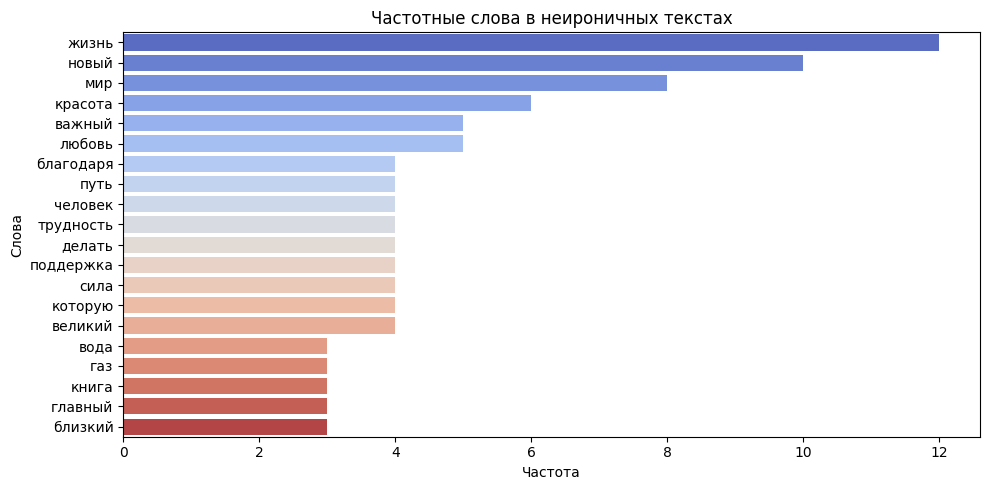

In [56]:
def get_top_n_words(corpus, n=20, stop_words=None): # функция принимает коллекцию текстов и возвращает топ n наиболее частотных слов
    vec = CountVectorizer(stop_words=stop_words).fit(corpus) # удаляем стоп-слова до подсчета частоты
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

top_words_irony = get_top_n_words(df[df['Class'] == 1]['processed_text'], n=20, stop_words=stop_words) # выделяем два списка топ-слов: для ироничных и неироничных текстов
top_words_non_irony = get_top_n_words(df[df['Class'] == 0]['processed_text'], n=20, stop_words=stop_words) # выделяем два списка топ-слов: для ироничных и неироничных текстов

def plot_top_words(words_freq, title): # визуализируем список слов и их частот
    words, freqs = zip(*words_freq)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(freqs), y=list(words), palette='coolwarm')
    plt.title(title)
    plt.xlabel("Частота")
    plt.ylabel("Слова")
    plt.tight_layout()
    plt.show()

plot_top_words(top_words_irony, "Частотные слова в ироничных текстах") # визуализируем наиболее частотные слова
plot_top_words(top_words_non_irony, "Частотные слова в неироничных текстах") # визуализируем наиболее частотные слова

# 4. TF-IDF векторизация, обучение модели и оценка качества.

Используем TF-IDF для представления текста в числовом виде.
Обучаем логистическую регрессию и оцениваем её качество.

In [63]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_features=5000) # преобразуем тексты в числовые векторы с TF-IDF, ограничиваем количество признаков
X_tfidf = vectorizer.fit_transform(df['processed_text']) # трансформируем тексты из колонки processed_text в матрицу признаков X_tfidf

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['Class'], test_size=0.2, random_state=42) # разбиваем данные на тренировочную и тестовую выборки
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train) # обучаем модель на тренировочных данных

LogisticRegression(max_iter=1000)

In [65]:
y_pred = model.predict(X_test) # получаем предсказания модели на тестовых данных
print("Отчет по классификации:")
print(classification_report(y_test, y_pred)) # выводим подробный отчёт по классификации - Precision, Recall, F1-score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.56      0.92      0.70        26
           1       0.88      0.44      0.59        34

    accuracy                           0.65        60
   macro avg       0.72      0.68      0.64        60
weighted avg       0.74      0.65      0.63        60

Accuracy: 0.6500


# 5. Кластеризация текстов KMean

Разбиваем тексты на кластеры с помощью KMeans.

In [66]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_tfidf)
cluster_labels = kmeans.fit_predict(X_tfidf)

# 6. Определение топ-слов для каждого кластера

In [67]:
def get_top_n_words(corpus, n=20, stop_words=None):
    vec = CountVectorizer(stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

stop_words_list = list(stop_words)

top_words_irony = get_top_n_words(df[df['Class'] == 1]['processed_text'], n=20, stop_words=stop_words_list)
top_words_non_irony = get_top_n_words(df[df['Class'] == 0]['processed_text'], n=20, stop_words=stop_words_list)

for i in range(num_clusters):
    cluster_texts = df[df['cluster'] == i]['processed_text']
    top_words = get_top_n_words(cluster_texts)
    print(f"\nТоп слов для кластера {i}:")
    for word, freq in top_words:
        print(f"{word}: {freq}")


Топ слов для кластера 0:
решить: 20
жизнь: 14
человек: 13
новый: 12
говорить: 9
время: 8
сказать: 8
мир: 7
оказаться: 6
друг: 6
женщина: 6
бог: 6
любовь: 6
жить: 6
красота: 6
мужчина: 5
плохой: 5
новость: 5
здоровье: 5
день: 5

Топ слов для кластера 1:
сегодня: 5
откладывать: 2
решить: 2
завтра: 2
замечательный: 1
день: 1
чай: 1
выпить: 1
повеситься: 1
визит: 1
дантист: 1
любить: 1
большинство: 1
грешник: 1
отложить: 1
раскаяние: 1
тяжело: 1
сестра: 1
премьер: 1
министр: 1

Топ слов для кластера 2:
любить: 4
кофе: 2
кресло: 2
чёрный: 1
солнышко: 1
женщина: 1
искренний: 1
мужчина: 1
говорить: 1
поэтому: 1
выходной: 1
настроишься: 1
посидеть: 1
возле: 1
камин: 1
чашечкой: 1
качалке: 1
бац: 1
выясняться: 1
камина: 1

Топ слов для кластера 3:
душа: 3
счастие: 1
состояние: 1
музыка: 1
язык: 1
книга: 1
мост: 1

Топ слов для кластера 4:
делать: 11
трудность: 4
следовать: 2
жизнь: 2
великий: 2
убийство: 1
промах: 1
поболтать: 1
человек: 1
обед: 1
неприятель: 1
ошибка: 1
мешать: 1
невежливый: 

# 7. Визуализация кластеров с UMAP

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


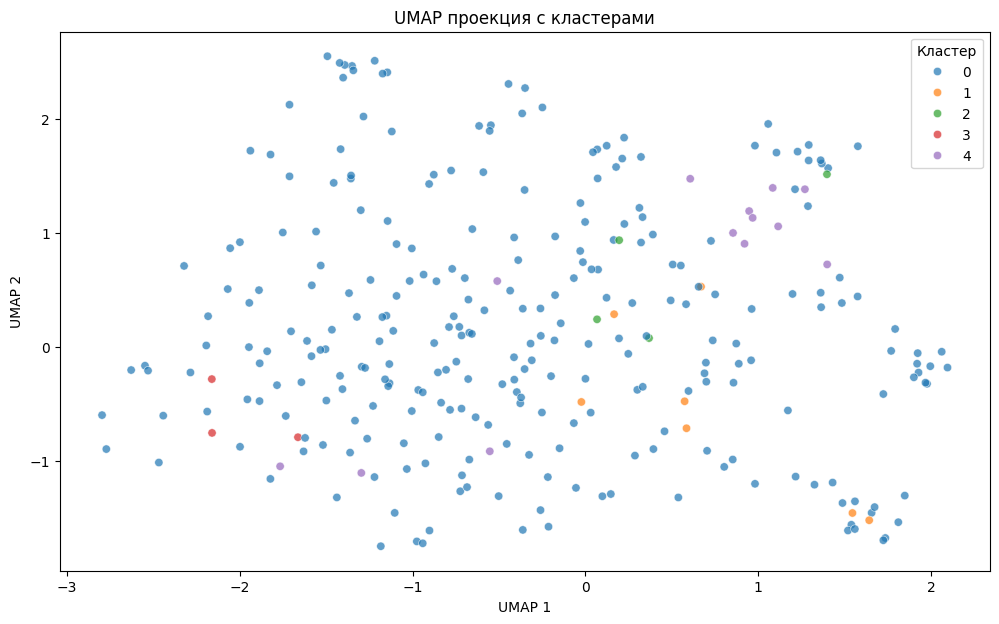

In [68]:
X_dense = X_tfidf.toarray()
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X_dense)

plt.figure(figsize=(12, 7))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=df['cluster'], palette='tab10', alpha=0.7)
plt.title('UMAP проекция с кластерами')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Кластер')
plt.show()

# 8. Функция предсказания новых текстов

Проверяем работу модели на примере пользовательского ввода.

In [70]:
def predict_irony(text, model, vectorizer, nlp, stop_words): # определяем вспомогательные функции очистки и предобработки текста
    def clean_text(text):
        text = text.lower()
        text = re.sub(r'[^а-яё\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    def preprocess_text(text):
        text = clean_text(text)
        tokens = nltk.word_tokenize(text, language="russian")
        tokens = [token for token in tokens if token not in stop_words]
        doc = nlp(' '.join(tokens))
        lemmas = [token.lemma_ for token in doc if token.lemma_ not in stop_words]
        return ' '.join(lemmas)

    processed = preprocess_text(text)
    X_vec = vectorizer.transform([processed])
    pred = model.predict(X_vec)[0]
    proba = model.predict_proba(X_vec)[0][pred] if hasattr(model, "predict_proba") else None

    return pred, proba

In [71]:
text_new = "люблю дождь!"
prediction, probability = predict_irony(text_new, model, vectorizer, nlp, stop_words)
print(f"\nТекст: {text_new}")
print(f"Предсказание: {'Ирония' if prediction == 1 else 'Не ирония'}")
if probability:
    print(f"Уверенность модели: {probability:.2f}")


Текст: люблю дождь!
Предсказание: Ирония
Уверенность модели: 0.57
